In [97]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
from skimage import measure

def extract_frames(video_path, output_dir='frames', frame_rate=1):
    """
    Extract frames from a video file at a specified frame rate.
    
    Parameters:
    - video_path (str): Path to the input video file
    - output_dir (str): Directory to save extracted frames (default: 'frames')
    - frame_rate (int): Extract one frame every 'frame_rate' frames (default: 1, meaning every frame)
    
    Returns:
    - List of paths to extracted frame images
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Open the video file
    video = cv2.VideoCapture(video_path)
    
    # Check if video opened successfully
    if not video.isOpened():
        raise ValueError(f"Error: Could not open video file {video_path}")
    
    # List to store paths of extracted frames
    frame_paths = []
    
    # Frame counter
    frame_count = 0
    saved_frame_count = 0
    
    try:
        while True:
            # Read a frame from the video
            ret, frame = video.read()
            
            # Break the loop if no more frames
            if not ret:
                break
            
            # Extract frame based on frame_rate
            if frame_count % frame_rate == 0:
                # Generate filename
                filename = os.path.join(output_dir, f'frame_{saved_frame_count:04d}.jpg')
                
                # Save the frame
                cv2.imwrite(filename, frame)
                frame_paths.append(filename)
                
                saved_frame_count += 1
            
            frame_count += 1
    
    finally:
        # Release the video capture object
        video.release()
    
    print(f"Extracted {saved_frame_count} frames from the video")
    return frame_paths

def process_mov_files():
    """Process all .MOV files in the current directory."""
    # Get all .MOV files in current directory
    mov_files = sorted([f for f in os.listdir('.') if f.lower().endswith('.mov')])
    
    if not mov_files:
        print("No .MOV files found in the current directory.")
        return
    
    # Create main frames directory if it doesn't exist
    os.makedirs('frames', exist_ok=True)
    
    # Process each .MOV file
    for i, mov_file in enumerate(mov_files, 1):
        # Create subdirectory for each video
        video_frames_dir = os.path.join('frames', str(i))
        extract_frames(mov_file, video_frames_dir)


In [98]:
process_mov_files()

Extracted 706 frames from the video
Extracted 585 frames from the video
Extracted 498 frames from the video
Extracted 538 frames from the video
Extracted 501 frames from the video
Extracted 467 frames from the video
Extracted 417 frames from the video
Extracted 448 frames from the video


In [99]:
m_ind = 1

def find_most_red_image(folder_path):
    """
    Find the image with the most red color in the given folder.
    
    Args:
        folder_path (str): Path to the folder containing images
    
    Returns:
        tuple: (most_red_image_path, most_red_image_index)
    """
    # Get list of image files
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif'))]
    image_files.sort()  # Ensure consistent ordering
    
    # Track most red image
    max_red_score = -1
    most_red_image_path = None
    most_red_image_index = -1
    
    # Analyze each image
    for index, image_file in enumerate(image_files):
        image_path = os.path.join(folder_path, image_file)
        image = cv2.imread(image_path)
        
        if image is None:
            continue
        
        # Convert to HSV color space for better red detection
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        
        # Create mask for red colors (two ranges due to color wrap-around in HSV)
        lower_red1 = np.array([0, 100, 100])
        upper_red1 = np.array([10, 255, 255])
        lower_red2 = np.array([160, 100, 100])
        upper_red2 = np.array([180, 255, 255])
        
        # Create masks
        mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
        mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
        red_mask = mask1 + mask2
        
        # Calculate red intensity score
        red_score = np.sum(red_mask)
        
        # Update most red image if current image has higher red score
        if red_score > max_red_score:
            max_red_score = red_score
            most_red_image_path = image_path
            most_red_image_index = index
    
    return most_red_image_path, most_red_image_index

def get_spaced_images(folder_path, start_index, num_images=18, spacing=15):
    """
    Get a series of images spaced apart from a given starting index.
    
    Args:
        folder_path (str): Path to the folder containing images
        start_index (int): Index to start selecting images from
        num_images (int): Number of images to return
        spacing (int): Number of images to skip between selections
    
    Returns:
        list: Paths to selected images
    """
    # Get list of image files
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif'))]
    image_files.sort()  # Ensure consistent ordering
    
    selected_images = []
    current_index = start_index
    
    for _ in range(num_images):
        if current_index < len(image_files):
            selected_images.append(os.path.join(folder_path, image_files[current_index]))
            current_index += spacing
    
    return selected_images

def get_images(ind):
    #folder_path = f'/Users/jakobkralj/jelka/frames/{ind}/'
    folder_path = f'./frames/{ind}/'
    
    # Find most red image
    most_red_image, most_red_index = find_most_red_image(folder_path)
    
    # Get 10 images spaced 24 apart
    spaced_images = get_spaced_images(folder_path, most_red_index+10)
    
    #print("Most Red Image:", most_red_image)
    #print("Spaced Images:", spaced_images)
    print(ind)
    return spaced_images

In [100]:
all_filenames = [get_images(x) for x in range(1, 9)]

1
2
3
4
5
6
7
8


In [101]:
def show_image(img, u = None, v = None):
    if u:
        for i, x, y, m in u:
            cv2.circle(img, (x, y), 7,
    		(0, 0, 255), 3)
    plt.imshow(img[:,:,::-1])

def generate_image(img, u, c):
    image = img*0
    for i, x, y, m in u:
        cv2.circle(image, (x, y), 3,
    		c[i], 3)
    plt.imshow(image[:,:,::-1])
    return image

cm = np.array([[1.97547873e+03, 0.00000000e+00, 1.06077279e+03],
 [0.00000000e+00, 2.05341424e+03, 5.13500761e+02],
 [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])
dist = np.array([ 0.37367123, -1.29505304, -0.01482113,  0.01368264,  0.92461805])

In [120]:
def generate_masks(filename):
    uncalibrated = cv2.imread(filename)
    frame = cv2.cvtColor(uncalibrated, cv2.COLOR_BGR2GRAY)
    return {
        "1" : (frame >= 230).astype('uint8'),
        "0" : (frame < 230).astype('uint8'),
    }

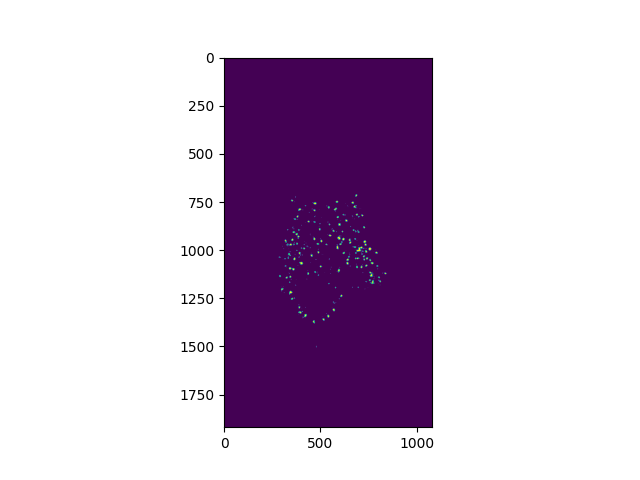

In [121]:
plt.close()
filename = all_filenames[7][2]
plt.imshow(generate_masks(filename)["1"])

In [122]:
uncalibrated = cv2.imread(filename)
f90 = cv2.rotate(uncalibrated, cv2.ROTATE_90_CLOCKWISE)
f90c = cv2.undistort(f90, cm, dist)
frcolor = cv2.rotate(f90c, cv2.ROTATE_90_COUNTERCLOCKWISE)
show_image(uncalibrated)

In [123]:
codes = []
for i in range(500):
    s = "0"*(9-len(bin(i)[2:])) + bin(i)[2:]
    t = ''.join(["1" if x == "0" else "0" for x in s])
    codes.append(s + t)

In [124]:
def get_names_lights(codes, masks):
    ms = []
    for i, c in enumerate(codes):
        aX = []
        aY = []
        m = None
        for n, l in zip(masks, list(c)):
            if type(m) == type(None):
                m = n[l]
            else:
                m = m & n[l]
                #m = m & n[l]
        #thresh = cv2.erode(m, None, iterations=1)
        thresh = m
        thresh = cv2.dilate(thresh, None, iterations=2)
        labels = measure.label(thresh, background=0, connectivity=1.1)
        curlM = None
        curMaxM = 0
        for label in np.unique(labels):
            # if this is the background label, ignore it
            if label == 0:
                continue
            # otherwise, construct the label mask and count the
            # number of pixels
            labelMask = np.zeros(thresh.shape, dtype="uint8")
            labelMask[labels == label] = 255
            numPixels = cv2.countNonZero(labelMask)
            # if the number of pixels in the component is sufficiently
            # large, then add it to our mask of "large blobs"
            if numPixels > 10:
                if numPixels > curMaxM:
                    curMaxM = numPixels
                    curlM = labelMask
        if curMaxM > 0:
            M = cv2.moments(curlM)
            x = int(M["m10"] / M["m00"])
            y = int(M["m01"] / M["m00"])
            if x > 100 and y < 1500:
                ms.append((i, x, y, m))
    print(len(ms))
    return ms

In [125]:
positions = []
for filenames in all_filenames:
    masks = [generate_masks(x) for x in filenames]
    positions.append(get_names_lights(codes, masks))

245
254
254
244
251
255
247
247


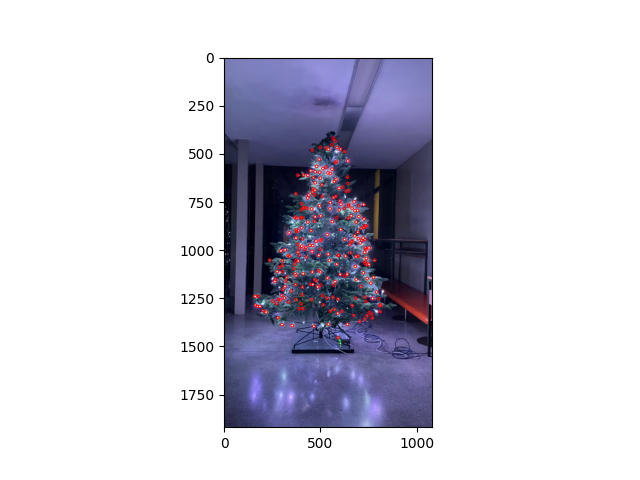

In [126]:
%matplotlib widget 
ind = 0
t = 5
frame = cv2.imread(all_filenames[ind][t])
plt.close()
show_image(frame, positions[ind])
plt.show()
# 550 560 520 612 565 534 545 

In [127]:
with open("pos.csv", mode="w") as f:
    for i, poss in enumerate(positions):
        for pos in poss:
            f.write(str(int(pos[0])) + "," + str(int(pos[1])) + "," + str(int(pos[2])) + "," + str(i) + "\n")

In [128]:
from position_calculator import Smreka
import math

print("Reading data...")
data = []
with open("pos.csv") as f:
    for line in f.readlines():
        lucka, x, z, pogled = map(int, line.split(","))
        data.append((lucka, x, z, pogled))

# x = 0 je na levem robu slike
#center_x = [1030, 1041, 1037, 1006, 1050, 1006, 943, 1059]# zares je sredina smreke na 920, ampak tkole so boljši rezultati
center_x = [514, 550, 560, 520, 612, 565, 534, 545 ]
angles = [n * 45 for n in range(8)]
# center_x = [0] * 4
# koordinatni sistem je obrnjen,
lowest_z = max(data, key=lambda x: x[2])[2]
height_on_image = abs(min(data, key=lambda x: x[2])[2] - lowest_z)
width, height = 100, 200
scale = height / height_on_image
print(f"{scale=}")
print(f"{lowest_z=}")
print(f"{center_x=}")
smreka = Smreka(0, 200, 0, height=height, width=width)
lp = {}
for lucka, x, z, pogled in data:
    x -= center_x[pogled]
    z = lowest_z - z
    smreka.rotate_to(math.radians(angles[pogled]))
    if lucka not in lp:
        lp[lucka] = []
    if True:  # pogled != 2 or 0 not in lp[lucka]:
        smreka.add_line(x * scale, z * scale, lucka)
        lp[lucka].append(pogled)

# print(*smreka.lines.items(), sep="\n")
print("Calculating lucke...")
smreka.calculate_lucke()
for lucka in smreka.lucke:
    if not smreka.lucke[lucka].success:
        print(
            f"{lucka=}: result={smreka.lucke[lucka].x} cost={smreka.lucke[lucka].cost} success={smreka.lucke[lucka].success}"
        )

print("Writing data...")
with open("lucke3d.csv", "w") as f:
    for lucka in sorted(smreka.lucke.keys()):
        f.write(
            f"{lucka},{smreka.lucke[lucka].x[0]},{-smreka.lucke[lucka].x[1]},{smreka.lucke[lucka].x[2]}\n"
        )


Reading data...
scale=0.18552875695732837
lowest_z=1456
center_x=[514, 550, 560, 520, 612, 565, 534, 545]
Calculating lucke...
Writing data...


In [140]:
lucke = {}
for lucka in smreka.lucke.keys():
    lucke[lucka] = {
        "x" : smreka.lucke[lucka].x[0],
        "y" : smreka.lucke[lucka].x[1],
        "z" : smreka.lucke[lucka].x[2],
    }

In [141]:
x = [smreka.lucke[i].x[0] for i in smreka.lucke.keys()]
y = [smreka.lucke[i].x[1] for i in smreka.lucke.keys()]
z = [smreka.lucke[i].x[2] for i in smreka.lucke.keys()]

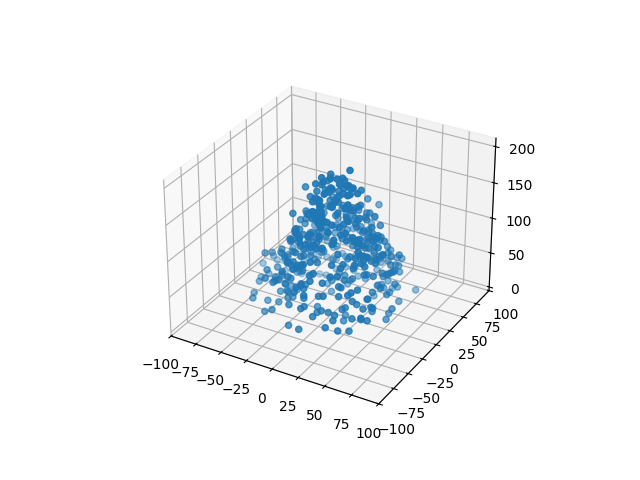

In [142]:
%matplotlib widget 
from mpl_toolkits.mplot3d import Axes3D 
plt.close()
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(x, y, z)
ax.set_xlim([-100, 100])
ax.set_ylim([-100, 100])
plt.show()

In [143]:
def avg_x(a, wa,  b, wb):
    return { "x" : wa*a.x[0] + wb*b.x[0], "y" : wa*a.x[1] + wb*b.x[1], "z" : wa*a.x[2] + wb*b.x[2]}
for i in range(500):
    if i not in smreka.lucke.keys():
        print(i)
        aw = 0
        bw = 0
        for ai in range(i, 0, -1):
            if ai in smreka.lucke.keys():
                aw = abs(i - ai)
                break
        for bi in range(i, 500):
            if bi in smreka.lucke.keys():
                bw = abs(bi - i)
                break
        aw, bw = aw / (aw + bw), bw / (aw + bw)
        lucke[i] = avg_x(smreka.lucke[ai], aw, smreka.lucke[bi], bw)
        print(f"Lucka {i} crated from lucke {ai} and {bi}")

157
Lucka 157 crated from lucke 156 and 158
250
Lucka 250 crated from lucke 249 and 253
251
Lucka 251 crated from lucke 249 and 253
252
Lucka 252 crated from lucke 249 and 253
254
Lucka 254 crated from lucke 253 and 256
255
Lucka 255 crated from lucke 253 and 256
283
Lucka 283 crated from lucke 282 and 284
287
Lucka 287 crated from lucke 286 and 289
288
Lucka 288 crated from lucke 286 and 289
291
Lucka 291 crated from lucke 290 and 292
297
Lucka 297 crated from lucke 296 and 298
300
Lucka 300 crated from lucke 299 and 301
323
Lucka 323 crated from lucke 322 and 324
325
Lucka 325 crated from lucke 324 and 326
342
Lucka 342 crated from lucke 341 and 344
343
Lucka 343 crated from lucke 341 and 344
347
Lucka 347 crated from lucke 346 and 348
349
Lucka 349 crated from lucke 348 and 350
362
Lucka 362 crated from lucke 361 and 363
366
Lucka 366 crated from lucke 365 and 367
376
Lucka 376 crated from lucke 375 and 378
377
Lucka 377 crated from lucke 375 and 378
397
Lucka 397 crated from lucke 

In [144]:
x = [lucke[i]["x"] for i in lucke.keys()]
y = [lucke[i]["y"] for i in lucke.keys()]
z = [lucke[i]["z"] for i in lucke.keys()]

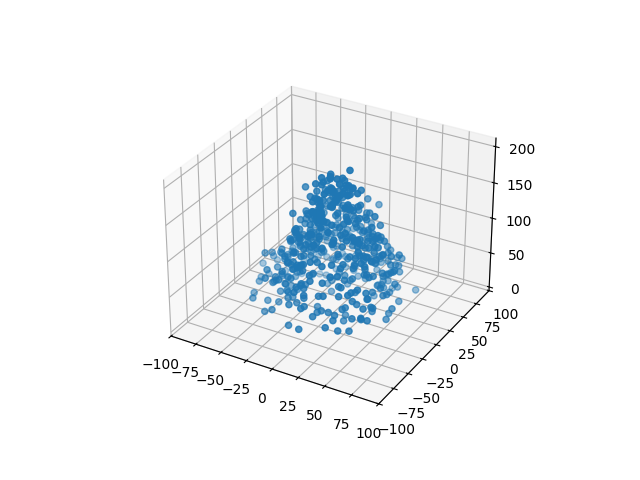

In [145]:
%matplotlib widget 
from mpl_toolkits.mplot3d import Axes3D 
plt.close()
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(x, y, z)
ax.set_xlim([-100, 100])
ax.set_ylim([-100, 100])
plt.show()

In [146]:
with open("positions.csv", mode="w") as w:
    for i in range(500):
        w.write(f"{i},{lucke[i]["x"]},{lucke[i]["y"]},{lucke[i]["z"]}\n")

In [147]:
with open("positions.js", mode = "w") as w:
    w.write("const positions = {\n")
    for i in range(500):
        w.write(f"\t{i}: {{ x: {lucke[i]["x"]}, y: {lucke[i]["y"]}, z: {lucke[i]["z"]} }},\n")
    w.write("}\n")
    